### aim: 

### date: 

In [17]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [18]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [19]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [20]:

scendict = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'color2':'orange'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'color2':'orangered'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'color2':'mediumseagreen'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'color2':'green'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'color2':'dodgerblue'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'color2':'mediumblue'}
}


In [21]:
mld_ukesm_1A = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_1A.nc')
mld_ukesm_1B = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_1B.nc')
mld_ukesm_2A = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_2A.nc')
mld_ukesm_2B = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_2B.nc')
mld_ukesm_3A = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_3A.nc')
mld_ukesm_3B = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_3B.nc')

# mld_tom_1A = xr.open_dataset(f'./extracted-summary/somxl010_tom_1AA7.nc')
# mld_tom_1B = xr.open_dataset(f'./extracted-summary/somxl010_tom_1BA7.nc')
# mld_tom_2A = xr.open_dataset(f'./extracted-summary/somxl010_tom_2AA7.nc')
# mld_tom_2B = xr.open_dataset(f'./extracted-summary/somxl010_tom_2BA7.nc')
# mld_tom_3A = xr.open_dataset(f'./extracted-summary/somxl010_tom_3AA7.nc')
# mld_tom_3B = xr.open_dataset(f'./extracted-summary/somxl010_tom_3BA7.nc')

sst_ukesm_1A = xr.open_dataset(f'./extracted-summary/SST_ukesm_1A.nc')
sst_ukesm_1B = xr.open_dataset(f'./extracted-summary/SST_ukesm_1B.nc')
sst_ukesm_2A = xr.open_dataset(f'./extracted-summary/SST_ukesm_2A.nc')
sst_ukesm_2B = xr.open_dataset(f'./extracted-summary/SST_ukesm_2B.nc')
sst_ukesm_3A = xr.open_dataset(f'./extracted-summary/SST_ukesm_3A.nc')
sst_ukesm_3B = xr.open_dataset(f'./extracted-summary/SST_ukesm_3B.nc')

# sst_tom_1A = xr.open_dataset(f'./extracted-summary/SST_tom_1AA7.nc')
# sst_tom_1B = xr.open_dataset(f'./extracted-summary/SST_tom_1BA7.nc')
# sst_tom_2A = xr.open_dataset(f'./extracted-summary/SST_tom_2AA7.nc')
# sst_tom_2B = xr.open_dataset(f'./extracted-summary/SST_tom_2BA7.nc')
# sst_tom_3A = xr.open_dataset(f'./extracted-summary/SST_tom_3AA7.nc')
# sst_tom_3B = xr.open_dataset(f'./extracted-summary/SST_tom_3BA7.nc')

## get trend - MLD

In [22]:
# def get_effect_ozone(sc1,sc2,dec1=1950, dec2=2090,var = 'wspd10m', seas = 'FY'):

#     ##for warming just have 
#     sc = sc1 - sc2
    
#     if seas == 'FY':
        
#         start = sc[var].sel(time_counter=slice(f'{dec1}-01-01', f'{dec1+10}-01-01')).\
#         groupby('time_counter.year').mean().mean().values
#         end = sc[var].sel(time_counter=slice(f'{dec2}-01-01', f'{dec2+10}-01-01')).\
#         groupby('time_counter.year').mean().mean().values
        
#     else:
        
#         start = sc[var].sel(time_counter=slice(f'{dec1}-01-01', f'{dec1+10}-01-01'))
#         start = start.sel(time_counter=(start['time_counter.season'] == seas)).\
#         groupby('time_counter.year').mean().mean().values
        
#         end = sc[var].sel(time_counter=slice(f'{dec2}-01-01', f'{dec2+10}-01-01'))
#         end = end.sel(time_counter=(end['time_counter.season'] == seas)).\
#         groupby('time_counter.year').mean().mean().values
    
#     effect1 = end-start # the better one i think 
#     effect2 = end
    
#     return effect1, effect2

# def get_effect_warming(sc1,dec1=1950, dec2=2090,var = 'wspd10m', seas = 'FY'):

#     ##for warming just have 
#     sc = sc1
    
#     if seas == 'FY':
        
#         start = sc[var].sel(time_counter=slice(f'{dec1}-01-01', f'{dec1+10}-01-01')).\
#         groupby('time_counter.year').mean().mean().values
#         end = sc[var].sel(time_counter=slice(f'{dec2}-01-01', f'{dec2+10}-01-01')).\
#         groupby('time_counter.year').mean().mean().values

#     else:
        
#         start = sc[var].sel(time_counter=slice(f'{dec1}-01-01', f'{dec1+10}-01-01'))
#         start = start.sel(time_counter=(start['time_counter.season'] == seas)).\
#         groupby('time_counter.year').mean().mean().values
        
#         end = sc[var].sel(time_counter=slice(f'{dec2}-01-01', f'{dec2+10}-01-01'))
#         end = end.sel(time_counter=(end['time_counter.season'] == seas)).\
#         groupby('time_counter.year').mean().mean().values
    
#     effect1 = end-start # the better one i think 
#     effect2 = end
    
#     return effect1, effect2

In [23]:
# fact = 1
# tlw = 1.5
# tw = 0.3
# fig, axs = plt.subplots(4,5, figsize=(18*fact, 12*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()
# var = 'somxl010'; vardesc = 'MLD'; ylab = 'm'

#  #####
# wspdset = [mld_ukesm_1A, mld_ukesm_1B, mld_ukesm_2A, mld_ukesm_2B, mld_ukesm_3A, mld_ukesm_3B]
# scens = ['1A', '1B', '2A', '2B', '3A', '3B']

# mld_ukesm_2A_50 = mld_ukesm_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
# mld_ukesm_2B_50 = mld_ukesm_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

# wspdset_o3 = [(mld_ukesm_3B-mld_ukesm_2B), (mld_ukesm_3A-mld_ukesm_2A), \
#               (mld_ukesm_1B-mld_ukesm_2B), (mld_ukesm_1A-mld_ukesm_2A)]
# scens_o3 = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
# cols_o3 = ['#822722', '#FF462B', '#87800A', '#E8D215']

# #wspdset_t = [(wspd_2B-wspd_2B_50), (wspd_2A-wspd_2A_50)]
# cols_t = ['dimgrey', 'silver']
# scens_t = ['high temp.','low temp.']

# for x in range(0,6):
#     tsc = scens[x]
#     wspd = wspdset[x]
    
#     tv = wspd[var].groupby('time_counter.year').mean()
#     tv_rol = tv.rolling(year=10, center=True).mean()
#     #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
#     tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, linestyle = ':', alpha = 1, label = scendict[tsc]['name2'])
      
#     tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
#     tv_rol = tv.rolling(year=10, center=True).mean()
#     #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
#     tv_rol.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 2, linestyle = ':', alpha = 1, label = scendict[tsc]['name2'])
    
#     tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
#     tv_rol = tv.rolling(year=10, center=True).mean()
#     #tv.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
#     tv_rol.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 2, linestyle = ':', alpha = 1, label = scendict[tsc]['name'])
    
#     tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
#     tv_rol = tv.rolling(year=10, center=True).mean()
#     #tv.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
#     tv_rol.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 2, linestyle = ':', alpha = 1, label = scendict[tsc]['name'])
    
#     tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
#     tv_rol = tv.rolling(year=10, center=True).mean()
#     #tv.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
#     tv_rol.plot(ax = axs[4], color = scendict[tsc]['color'], linewidth = 2, linestyle = ':', alpha = 1)
    
# #axs[3].legend(loc = (0.06, 0.5), ncol = 2, fontsize = 10)

# ##### ozone effect
# ind = 5
# for x in range(0,4):
#     tsc = scens_o3[x]
#     wspd = wspdset_o3[x]
#     tv = wspd[var].groupby('time_counter.year').mean()
#     tv_rol = tv.rolling(year=10, center=True).mean()
#     #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
#     tv_rol.plot(ax = axs[0+ind], color = cols_o3[x], linewidth = tlw, linestyle = ':', alpha = 1, label = scens_o3[x])    
    
#     tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
#     tv_rol = tv.rolling(year=10, center=True).mean()
#     #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
#     tv_rol.plot(ax = axs[1+ind], color = cols_o3[x], linewidth = tlw, linestyle = ':', alpha = 1, label = scens_o3[x])
    
#     tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
#     tv_rol = tv.rolling(year=10, center=True).mean()
#     #tv.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
#     tv_rol.plot(ax = axs[2+ind], color = cols_o3[x], linewidth = tlw, linestyle = ':', alpha = 1, label = scens_o3[x])
    
#     tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
#     tv_rol = tv.rolling(year=10, center=True).mean()
#     #tv.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
#     tv_rol.plot(ax = axs[3+ind], color = cols_o3[x], linewidth = tlw, linestyle = ':', alpha = 1)
    
#     tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
#     tv_rol = tv.rolling(year=10, center=True).mean()
#     #tv.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
#     tv_rol.plot(ax = axs[4+ind], color = cols_o3[x], linewidth = tlw, linestyle = ':', alpha = 1)
    
# #### temperature effect
# ind = 10
# tv = mld_ukesm_2B[var].groupby('time_counter.year').mean()-\
# mld_ukesm_2B_50[var].mean().values
# tv_rol = tv.rolling(year=10, center=True).mean()
# #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
# tv_rol.plot(ax = axs[0+ind], color = cols_t[0], linewidth = tlw, linestyle = ':', alpha = 1, label = scens_t[0])

# tv = mld_ukesm_2B[var].sel(time_counter=(mld_ukesm_2B['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
# mld_ukesm_2B_50[var].sel(time_counter=(mld_ukesm_2B_50['time_counter.season'] == 'DJF')).mean().values
# tv_rol = tv.rolling(year=10, center=True).mean()
# #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
# tv_rol.plot(ax = axs[1+ind], color = cols_t[0], linewidth = tlw, linestyle = ':', alpha = 1, label = scens_t[0])

# tv = mld_ukesm_2B[var].sel(time_counter=(mld_ukesm_2B['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()-\
# mld_ukesm_2B_50[var].sel(time_counter=(mld_ukesm_2B_50['time_counter.season'] == 'MAM')).mean().values
# tv_rol = tv.rolling(year=10, center=True).mean()
# #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
# tv_rol.plot(ax = axs[2+ind], color = cols_t[0], linewidth = tlw, linestyle = ':', alpha = 1, label = scens_t[0])
    
# tv = mld_ukesm_2B[var].sel(time_counter=(mld_ukesm_2B['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()-\
# mld_ukesm_2B_50[var].sel(time_counter=(mld_ukesm_2B_50['time_counter.season'] == 'JJA')).mean().values
# tv_rol = tv.rolling(year=10, center=True).mean()
# #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
# tv_rol.plot(ax = axs[3+ind], color = cols_t[0], linewidth = tlw, linestyle = ':', alpha = 1, label = scens_t[0])

# tv = mld_ukesm_2B[var].sel(time_counter=(mld_ukesm_2B['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()-\
# mld_ukesm_2B_50[var].sel(time_counter=(mld_ukesm_2B_50['time_counter.season'] == 'SON')).mean().values
# tv_rol = tv.rolling(year=10, center=True).mean()
# #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
# tv_rol.plot(ax = axs[4+ind], color = cols_t[0], linewidth = tlw, linestyle = ':', alpha = 1, label = scens_t[0])    
    
# tv = mld_ukesm_2A[var].groupby('time_counter.year').mean()-\
# mld_ukesm_2A_50[var].mean().values
# tv_rol = tv.rolling(year=10, center=True).mean()
# #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
# tv_rol.plot(ax = axs[0+ind], color = cols_t[1], linewidth = tlw, linestyle = ':', alpha = 1, label = scens_t[1])

# tv = mld_ukesm_2A[var].sel(time_counter=(mld_ukesm_2A['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
# mld_ukesm_2A_50[var].sel(time_counter=(mld_ukesm_2A_50['time_counter.season'] == 'DJF')).mean().values
# tv_rol = tv.rolling(year=10, center=True).mean()
# #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
# tv_rol.plot(ax = axs[1+ind], color = cols_t[1], linewidth = tlw, linestyle = ':', alpha = 1, label = scens_t[1])

# tv = mld_ukesm_2A[var].sel(time_counter=(mld_ukesm_2A['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()-\
# mld_ukesm_2A_50[var].sel(time_counter=(mld_ukesm_2A_50['time_counter.season'] == 'MAM')).mean().values
# tv_rol = tv.rolling(year=10, center=True).mean()
# #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
# tv_rol.plot(ax = axs[2+ind], color = cols_t[1], linewidth = tlw, linestyle = ':', alpha = 1, label = scens_t[1])
    
# tv = mld_ukesm_2A[var].sel(time_counter=(mld_ukesm_2A['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()-\
# mld_ukesm_2A_50[var].sel(time_counter=(mld_ukesm_2A_50['time_counter.season'] == 'JJA')).mean().values
# tv_rol = tv.rolling(year=10, center=True).mean()
# #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
# tv_rol.plot(ax = axs[3+ind], color = cols_t[1], linewidth = tlw, linestyle = ':', alpha = 1, label = scens_t[1])

# tv = mld_ukesm_2A[var].sel(time_counter=(mld_ukesm_2A['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()-\
# mld_ukesm_2A_50[var].sel(time_counter=(mld_ukesm_2A_50['time_counter.season'] == 'SON')).mean().values
# tv_rol = tv.rolling(year=10, center=True).mean()
# #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
# tv_rol.plot(ax = axs[4+ind], color = cols_t[1], linewidth = tlw, linestyle = ':', alpha = 1, label = scens_t[1])  
# ##low T


# ##################
# ### titles, etc
# plt.subplots_adjust(hspace = 0.48 )
# plt.subplots_adjust(wspace = 0.28 )
# t1 = 'mixed layer depth, 1950-2100'
# t2 = 'effect of ozone concentration changes on mixed layer depth, 1950-2100'
# t3 = 'effect of GHG emissions on mixed layer depth, 1950-2100'
# t4 = 'effect of ozone concentration changes and GHG emissions on mixed layer depth, $\overline{2090-2100} - \overline{1950-1960}$'
# fs = 16

# plt.figtext(0.5,0.92, t1, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.71, t2, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.5, t3, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.3, t4, ha="center", va="top", fontsize=fs, color="k")

# # #####
# for ind in range(0,15):
#     axs[ind].axhline(y=0, color = 'k', linewidth = 0.5)
    
# for ind in range(15,20):
#     axs[ind].axhline(y=0, color = 'k', linewidth = 0.5)
#     axs[ind].set_ylim(-0.2,0.82)
# axs[0].set_ylabel('m')

# for i in range(0,20):
#     axs[i].tick_params(axis="x", direction="out", length=1, width=1, color="turquoise")
#     axs[i].grid(alpha = 0.5)
    
# for i in range(0,15):
#     axs[i].set_xlim([1950,2100])
#     axs[i].set_xlabel('')
    
# lab = ['a)','b)','c)','d)','e)',] 
# ymi = np.array([40,0,40,70,60])  
# hi = 80
# for i in range(0,5):
#     axs[i].set_ylim([ymi[i],ymi[i]+hi])
#     axs[i].text(1960,ymi[i]+0.85*hi,lab[i])
    
# lab = ['f)','g)','h)','i)','j)']  
# ymi = -5; hi=20
# for i in range(0,5):
#     axs[i+5].set_ylim([ymi,ymi+hi])
#     axs[i+5].text(1960,ymi+0.85*hi,lab[i])
    
# lab = ['k)','l)','m)','n)','o)']  
# ymi = -20; hi=25
# for i in range(0,5):
#     axs[i+10].set_ylim([ymi,ymi+hi])
#     axs[i+10].text(1960,ymi+0.85*hi,lab[i])
    
# lab = ['p)','q)','r)','s)','t)']  
# ymi = np.array([-20,-20,-20,-20,-20,])
# hi = 30
# for i in range(0,5):
#     axs[i+15].set_ylim([ymi[i],ymi[i]+hi])
#     axs[i+15].set_xlim([0.7,6.7])
#     axs[i+15].text(1,ymi[i]+0.85*hi,lab[i])

# tits = ['full year','DJF','MAM','JJA','SON',]
# for i in range(0,5):
#     axs[i].set_title(tits[i])    

# #plt.tight_layout()
# tits = ['full year','DJF','MAM','JJA','SON',]
# for i in range(0,5):
#     axs[i].set_title(tits[i])
    
# # axs[7].legend(fontsize = 8)
# # axs[12].legend()
# #plt.tight_layout()
# #fig.savefig('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/figs/Fig-MLDline.jpg')
# # fname = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/figs/Fig-MLDline.jpg'
# # fig.savefig(fname, transparent=None, dpi=250, format=None,
# #         metadata=None, bbox_inches=None, pad_inches=0.1,
# #         facecolor='auto', edgecolor='auto', backend=None,
# #        )
   

In [24]:
import pymannkendall as mk
from scipy import stats
def give_trends(ts_x,ts_y):

    trend, h, mk_p, z, Tau, s, var_s, mk_slope, mk_intercept = mk.original_test(ts_y)
    lin_slope, lin_intercept, r_value, lin_p, std_err = stats.linregress(ts_x,ts_y)
    
    return mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p 

In [26]:
verbose = False
mld_ukesm_2A_50 = mld_ukesm_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
mld_ukesm_2B_50 = mld_ukesm_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

mld_OR_A = mld_ukesm_1A-mld_ukesm_2A
mld_OR_B = mld_ukesm_1B-mld_ukesm_2B
var = 'somxl010'

datar = np.zeros([3,5,2,2])
data_vars = {'trend':(['period', 'season','forcing','scenario'], datar,
{'units': '/decade',
'long_name':''}),
}
# define coordinates
coords = {'period': (['period'], ['1950-2000','2000-2050','2050-2100']),
          'season': (['season'], ['FY','DJF','MAM','JJA','SON']),
          'forcing': (['forcing'], ['ghg','ozone']),
          'scenario': (['scenario'], ['ssp1','ssp3']),
         }
attrs = {'made in':'SOZONE/windAnalyis/oceanFields/bargraph-with-50yrtrends.ipynb',
'desc': 'medusa trends in quantity of interest, south of -50 south, decadal'
}
ds = xr.Dataset(data_vars=data_vars,
coords=coords,
attrs=attrs)
# ds.tonetcdf()
periodar = ['1950-2000','2000-2050','2050-2100']
seasar = ['FY','DJF','MAM','JJA','SON']
scenar = ['ssp1', 'ssp3']
dsar = [mld_OR_A, mld_OR_B]
periodst = [1950,2000,2050]
perioden = [2000,2050,2100]

# plt.figure()
### or, low ssp
tforc = 'ozone'; tscen = 'ssp1';
 #ozone-isolated scenarios
for s in range(0,2):
    tscen = scenar[s]
    tds = dsar[s]
    
    for p in range(0,3):
        tper = periodar[p]
        for s in range(0,5):
            tseas = seasar[s]
            if verbose:
                print('')
                print(f'{tper}, {tseas}')
            tdat = tds[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
            if tseas == 'FY':
                tval = tdat.groupby('time_counter.year').mean()
    #             plt.plot(tval,label = tper)
    #             ts_x = np.arange(periodst[p],perioden[p])
                ts_x = np.arange(50)

                mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                give_trends(ts_x,tval)
                if verbose:
                    print(f'{mk_slope},{mk_intercept},{mk_p}')
                    print(f'{lin_slope},{lin_intercept},{lin_p}')

                if lin_p > 0.05:
                    lin_slope = np.nan

            else:
                tval = tdat.sel(time_counter=(tdat['time_counter.season'] == tseas)).\
                groupby('time_counter.year').mean()
                
                
                
                mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                give_trends(ts_x,tval)
                if verbose:
                    print(f'{mk_slope},{mk_intercept},{mk_p}')
                    print(f'{lin_slope},{lin_intercept},{lin_p}')
                if lin_p > 0.05:
                    lin_slope = np.nan                        

            ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
            if verbose:
                print(f'{tper},{tseas},{tforc},{tscen}, {lin_slope*10}')

tforc = 'ghg'; 
tds1ar = [mld_ukesm_2A, mld_ukesm_2B]
tdsBASEar = [mld_ukesm_2A_50, mld_ukesm_2B_50]
#ghg-isolated scenarios
for s in range(0,2):
    tscen = scenar[s]
    tds1 = tds1ar[s]
    tdsBASE = tdsBASEar[s]
    
    for p in range(0,3):
        tper = periodar[p]
        for s in range(0,5):
            tseas = seasar[s]
            if verbose:
                print('')
                print(f'{tper}, {tseas}')
                
                
            if tseas == 'FY':
                tval = tds1[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))\
                .groupby('time_counter.year').mean()-\
                tdsBASE[var].mean().values
    #             plt.plot(tval,label = tper)
    #             ts_x = np.arange(periodst[p],perioden[p])
                ts_x = np.arange(50)

                mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                give_trends(ts_x,tval)
                if verbose:
                    print(f'{mk_slope},{mk_intercept},{mk_p}')
                    print(f'{lin_slope},{lin_intercept},{lin_p}')

                if lin_p > 0.05:
                    lin_slope = np.nan

            else:
                tval = tds1[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                tval = tval.sel(time_counter=(tval['time_counter.season'] == tseas)).\
                groupby('time_counter.year').mean()-\
                tdsBASE[var].sel(time_counter=(tdsBASE['time_counter.season'] == tseas)).\
                mean().values
                mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                give_trends(ts_x,tval)
                if verbose:
                    print(f'{mk_slope},{mk_intercept},{mk_p}')
                    print(f'{lin_slope},{lin_intercept},{lin_p}')
                if lin_p > 0.05:
                    lin_slope = np.nan                        

            ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
            if verbose:
                print(f'{tper},{tseas},{tforc},{tscen}, {lin_slope*10}')


# plt.legend()
ds.to_netcdf('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/extracted-summary/mld-medusa-50yrtrends.nc')

In [34]:
#print(ds.trend.values)
print(ds.trend.loc[{'period':tper, 'season':'SON', 'forcing' : tforc, 'scenario' : 'ssp3'}])

<xarray.DataArray 'trend' ()>
array(-2.24388065)
Coordinates:
    period    <U9 '2050-2100'
    season    <U3 'SON'
    forcing   <U5 'ghg'
    scenario  <U4 'ssp3'
Attributes:
    units:      /decade
    long_name:  


### sst

In [36]:
verbose = True
sst_ukesm_2A_50 = sst_ukesm_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
sst_ukesm_2B_50 = sst_ukesm_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

sst_OR_A = sst_ukesm_1A-sst_ukesm_2A
sst_OR_B = sst_ukesm_1B-sst_ukesm_2B
var = 'tos'

datar = np.zeros([3,5,2,2])
data_vars = {'trend':(['period', 'season','forcing','scenario'], datar,
{'units': '/decade',
'long_name':''}),
}
# define coordinates
coords = {'period': (['period'], ['1950-2000','2000-2050','2050-2100']),
          'season': (['season'], ['FY','DJF','MAM','JJA','SON']),
          'forcing': (['forcing'], ['ghg','ozone']),
          'scenario': (['scenario'], ['ssp1','ssp3']),
         }
attrs = {'made in':'SOZONE/windAnalyis/oceanFields/bargraph-with-50yrtrends.ipynb',
'desc': 'medusa trends in quantity of interest, south of -50 south, decadal'
}
ds = xr.Dataset(data_vars=data_vars,
coords=coords,
attrs=attrs)
# ds.tonetcdf()
periodar = ['1950-2000','2000-2050','2050-2100']
seasar = ['FY','DJF','MAM','JJA','SON']
scenar = ['ssp1', 'ssp3']
dsar = [sst_OR_A, sst_OR_B]
periodst = [1950,2000,2050]
perioden = [2000,2050,2100]

# plt.figure()
### or, low ssp
tforc = 'ozone'; tscen = 'ssp1';
 #ozone-isolated scenarios
for s in range(0,2):
    tscen = scenar[s]
    tds = dsar[s]
    
    for p in range(0,3):
        tper = periodar[p]
        for s in range(0,5):
            tseas = seasar[s]
            if verbose:
                print('')
                print(f'{tper}, {tseas}')
            tdat = tds[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
            if tseas == 'FY':
                tval = tdat.groupby('time_counter.year').mean()
    #             plt.plot(tval,label = tper)
    #             ts_x = np.arange(periodst[p],perioden[p])
                ts_x = np.arange(50)

                mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                give_trends(ts_x,tval)
                if verbose:
                    print(f'{mk_slope},{mk_intercept},{mk_p}')
                    print(f'{lin_slope},{lin_intercept},{lin_p}')

                if lin_p > 0.05:
                    lin_slope = np.nan

            else:
                tval = tdat.sel(time_counter=(tdat['time_counter.season'] == tseas)).\
                groupby('time_counter.year').mean()
                
                
                
                mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                give_trends(ts_x,tval)
                if verbose:
                    print(f'{mk_slope},{mk_intercept},{mk_p}')
                    print(f'{lin_slope},{lin_intercept},{lin_p}')
                if lin_p > 0.05:
                    lin_slope = np.nan                        

            ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
            if verbose:
                print(f'{tper},{tseas},{tforc},{tscen}, {lin_slope*10}')

tforc = 'ghg'; 
tds1ar = [sst_ukesm_2A, sst_ukesm_2B]
tdsBASEar = [sst_ukesm_2A_50, sst_ukesm_2B_50]
#ghg-isolated scenarios
for s in range(0,2):
    tscen = scenar[s]
    tds1 = tds1ar[s]
    tdsBASE = tdsBASEar[s]
    
    for p in range(0,3):
        tper = periodar[p]
        for s in range(0,5):
            tseas = seasar[s]
            if verbose:
                print('')
                print(f'{tper}, {tseas}')
                
                
            if tseas == 'FY':
                tval = tds1[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))\
                .groupby('time_counter.year').mean()-\
                tdsBASE[var].mean().values
    #             plt.plot(tval,label = tper)
    #             ts_x = np.arange(periodst[p],perioden[p])
                ts_x = np.arange(50)

                mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                give_trends(ts_x,tval)
                if verbose:
                    print(f'{mk_slope},{mk_intercept},{mk_p}')
                    print(f'{lin_slope},{lin_intercept},{lin_p}')

                if lin_p > 0.05:
                    lin_slope = np.nan

            else:
                tval = tds1[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                tval = tval.sel(time_counter=(tval['time_counter.season'] == tseas)).\
                groupby('time_counter.year').mean()-\
                tdsBASE[var].sel(time_counter=(tdsBASE['time_counter.season'] == tseas)).\
                mean().values
                mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                give_trends(ts_x,tval)
                if verbose:
                    print(f'{mk_slope},{mk_intercept},{mk_p}')
                    print(f'{lin_slope},{lin_intercept},{lin_p}')
                if lin_p > 0.05:
                    lin_slope = np.nan                        

            ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
            if verbose:
                print(f'{tper},{tseas},{tforc},{tscen}, {lin_slope*10}')


# plt.legend()
ds.to_netcdf('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/extracted-summary/sst-medusa-50yrtrends.nc')


1950-2000, FY
-0.004915444442257271,0.05674159245955565,0.016740900457430152
-0.003594507812393917,0.05122425271818571,0.022929620545866863
1950-2000,FY,ozone,ssp1, -0.03594507812393917

1950-2000, DJF
-0.009509581109161624,0.10487881825993509,0.0010416668608665969
-0.008284939189295445,0.11529975427326113,0.0018782492574258092
1950-2000,DJF,ozone,ssp1, -0.08284939189295445

1950-2000, MAM
-0.004784342074260012,0.020547334371295536,0.033613834998799774
-0.0036985366818712154,0.03528548186317968,0.06443250825073873
1950-2000,MAM,ozone,ssp1, nan

1950-2000, JJA
-0.0012490683367974442,0.03385036382444943,0.34028930263784596
-0.0012118304697333925,0.024739002874772646,0.2769408362936113
1950-2000,JJA,ozone,ssp1, nan

1950-2000, SON
-0.0015248652929550576,0.03713609317774098,0.24835655280437874
-0.0011827249086756152,0.029572771861529373,0.244012211439427
1950-2000,SON,ozone,ssp1, nan

2000-2050, FY
0.00942165399566352,-0.10525166008654563,6.739438955793986e-07
0.008388406903242994,-0.0782

0.012088602236270694,-0.02147708378710317,2.551543420992175e-10
0.012434756114917178,0.0004446428024432736,4.1971254038371614e-13
2000-2050,MAM,ghg,ssp3, 0.12434756114917178

2000-2050, JJA
0.011193528316104687,-0.027105315939937924,6.439293542825908e-15
0.011755367413933581,-0.008587207459738344,1.4905985724607493e-18
2000-2050,JJA,ghg,ssp3, 0.11755367413933582

2000-2050, SON
0.010891995117292774,-0.017913181753234864,6.661338147750939e-16
0.011239436167223435,-0.0035208415768566703,5.641995335027725e-19
2000-2050,SON,ghg,ssp3, 0.11239436167223435

2050-2100, FY
0.03142564103995188,0.6102437220369488,0.0
0.031204963869077493,0.7221472209046493,5.835264264512795e-34
2050-2100,FY,ghg,ssp3, 0.31204963869077496

2050-2100, DJF
0.035446120267629264,0.7094095598942214,0.0
0.03456534511562954,0.8193883316173315,5.261545680961537e-27
2050-2100,DJF,ghg,ssp3, 0.34565345115629537

2050-2100, MAM
0.0334044970989347,0.6499738217772487,0.0
0.03308249002125897,0.7605347978250737,1.4980805094432725e

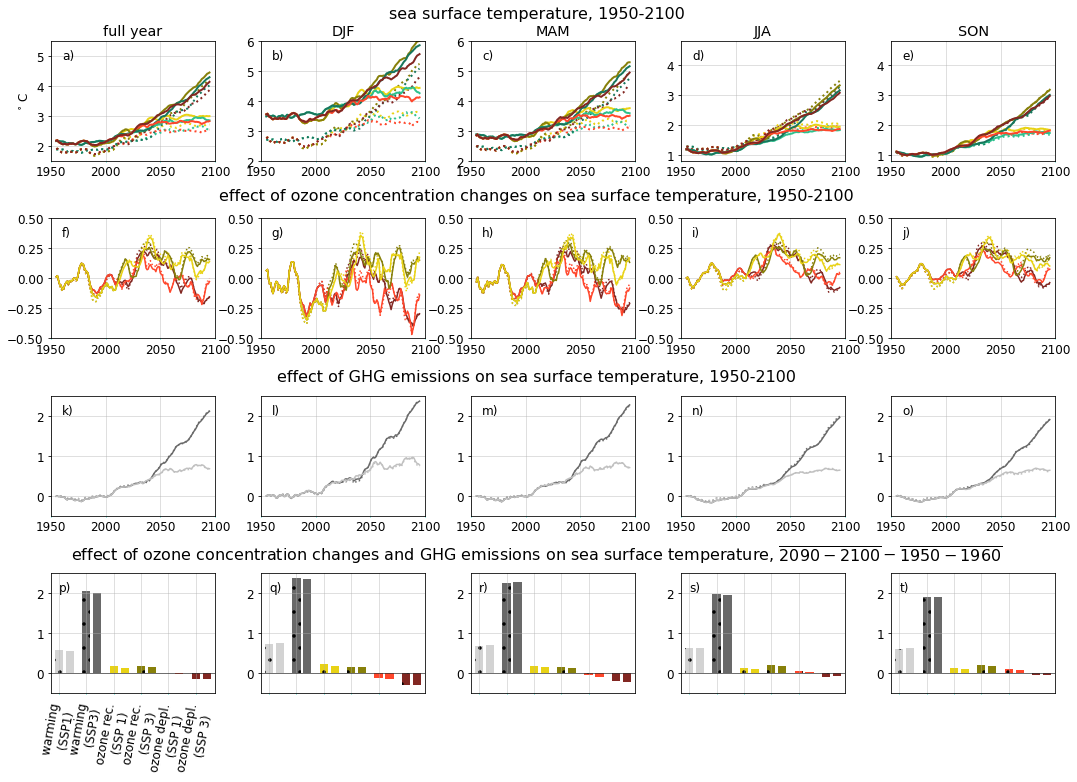

## OT

In [38]:
def make_yearlist_tom(yrst, yrend, tscen, \
                  tdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/max_OT/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        yr = yrs[i]
        ty = f'{tdir}/seas_OT_{yr}_{tscen}-TOMA7.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

ot_tom_1A = xr.open_mfdataset(make_yearlist_tom(1950,2099,'1A'))
ot_tom_2A = xr.open_mfdataset(make_yearlist_tom(1950,2099,'2A'))
ot_tom_3A = xr.open_mfdataset(make_yearlist_tom(1950,2099,'3A'))
ot_tom_1B = xr.open_mfdataset(make_yearlist_tom(1950,2099,'1B'))
ot_tom_2B = xr.open_mfdataset(make_yearlist_tom(1950,2099,'2B'))
ot_tom_3B = xr.open_mfdataset(make_yearlist_tom(1950,2099,'3B'))

def make_yearlist(yrst, yrend, tscen, \
                  tdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/max_OT/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        yr = yrs[i]
        ty = f'{tdir}/seas_OT_{yr}_{tscen}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

ot_ukesm_1A = xr.open_mfdataset(make_yearlist(1950,2099,'1A'))
ot_ukesm_2A = xr.open_mfdataset(make_yearlist(1950,2099,'2A'))
ot_ukesm_3A = xr.open_mfdataset(make_yearlist(1950,2099,'3A'))
ot_ukesm_1B = xr.open_mfdataset(make_yearlist(1950,2099,'1B'))
ot_ukesm_2B = xr.open_mfdataset(make_yearlist(1950,2099,'2B'))
ot_ukesm_3B = xr.open_mfdataset(make_yearlist(1950,2099,'3B'))

In [40]:
verbose = True
ot_ukesm_2A_50 = ot_ukesm_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
ot_ukesm_2B_50 = ot_ukesm_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

ot_OR_A = ot_ukesm_1A-ot_ukesm_2A
ot_OR_B = ot_ukesm_1B-ot_ukesm_2B
var = 'max_OT'
var1 = 'max_OT_yr'

datar = np.zeros([3,5,2,2])
data_vars = {'trend':(['period', 'season','forcing','scenario'], datar,
{'units': '/decade',
'long_name':''}),
}
# define coordinates
coords = {'period': (['period'], ['1950-2000','2000-2050','2050-2100']),
          'season': (['season'], ['FY','DJF','MAM','JJA','SON']),
          'forcing': (['forcing'], ['ghg','ozone']),
          'scenario': (['scenario'], ['ssp1','ssp3']),
         }
attrs = {'made in':'SOZONE/windAnalyis/oceanFields/bargraph-with-50yrtrends.ipynb',
'desc': 'medusa trends in quantity of interest, south of -50 south, decadal'
}
ds = xr.Dataset(data_vars=data_vars,
coords=coords,
attrs=attrs)
# ds.tonetcdf()
periodar = ['1950-2000','2000-2050','2050-2100']
seasar = ['FY','DJF','MAM','JJA','SON']
scenar = ['ssp1', 'ssp3']
dsar = [ot_OR_A, ot_OR_B]
periodst = [1950,2000,2050]
perioden = [2000,2050,2100]

# plt.figure()
### or, low ssp
tforc = 'ozone'; tscen = 'ssp1';
 #ozone-isolated scenarios
for s in range(0,2):
    tscen = scenar[s]
    tds = dsar[s]
    
    for p in range(0,3):
        tper = periodar[p]
        for s in range(0,5):
            tseas = seasar[s]
            if verbose:
                print('')
                print(f'{tper}, {tseas}')
            #tdat = tds[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
            if tseas == 'FY':
                tdat = tds[var1].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                tval = tdat.groupby('time_counter.year').mean()
    #             plt.plot(tval,label = tper)
    #             ts_x = np.arange(periodst[p],perioden[p])
                ts_x = np.arange(50)

                mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                give_trends(ts_x,tval)
                if verbose:
                    print(f'{mk_slope},{mk_intercept},{mk_p}')
                    print(f'{lin_slope},{lin_intercept},{lin_p}')

                if lin_p > 0.05:
                    lin_slope = np.nan

            else:
                tdat = tds[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                tval = tdat.sel(time_counter=(tdat['time_counter.season'] == tseas)).\
                groupby('time_counter.year').mean()
                
                
                
                mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                give_trends(ts_x,tval)
                if verbose:
                    print(f'{mk_slope},{mk_intercept},{mk_p}')
                    print(f'{lin_slope},{lin_intercept},{lin_p}')
                if lin_p > 0.05:
                    lin_slope = np.nan                        

            ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
            if verbose:
                print(f'{tper},{tseas},{tforc},{tscen}, {lin_slope*10}')

tforc = 'ghg'; 
tds1ar = [ot_ukesm_2A, ot_ukesm_2B]
tdsBASEar = [ot_ukesm_2A_50, ot_ukesm_2B_50]
#ghg-isolated scenarios
for s in range(0,2):
    tscen = scenar[s]
    tds1 = tds1ar[s]
    tdsBASE = tdsBASEar[s]
    
    for p in range(0,3):
        tper = periodar[p]
        for s in range(0,5):
            tseas = seasar[s]
            if verbose:
                print('')
                print(f'{tper}, {tseas}')
                
                
            if tseas == 'FY':
                tval = tds1[var1].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))\
                .groupby('time_counter.year').mean()-\
                tdsBASE[var1].mean().values
    #             plt.plot(tval,label = tper)
    #             ts_x = np.arange(periodst[p],perioden[p])
                ts_x = np.arange(50)

                mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                give_trends(ts_x,tval)
                if verbose:
                    print(f'{mk_slope},{mk_intercept},{mk_p}')
                    print(f'{lin_slope},{lin_intercept},{lin_p}')

                if lin_p > 0.05:
                    lin_slope = np.nan

            else:
                tval = tds1[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                tval = tval.sel(time_counter=(tval['time_counter.season'] == tseas)).\
                groupby('time_counter.year').mean()-\
                tdsBASE[var].sel(time_counter=(tdsBASE['time_counter.season'] == tseas)).\
                mean().values
                mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                give_trends(ts_x,tval)
                if verbose:
                    print(f'{mk_slope},{mk_intercept},{mk_p}')
                    print(f'{lin_slope},{lin_intercept},{lin_p}')
                if lin_p > 0.05:
                    lin_slope = np.nan                        

            ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
            if verbose:
                print(f'{tper},{tseas},{tforc},{tscen}, {lin_slope*10}')


# plt.legend()
ds.to_netcdf('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/extracted-summary/ot-medusa-50yrtrends.nc')


1950-2000, FY
0.08674333716634078,-1.0983409553700487,0.00400825843713104
0.09506956041949255,-1.550977496048147,0.004023149650986347
1950-2000,FY,ozone,ssp1, 0.9506956041949255

1950-2000, DJF
0.1420019958341392,-2.7718570826053828,1.9893973186135838e-05
0.1397836401776597,-2.7043666828795043,5.919747038804147e-06
1950-2000,DJF,ozone,ssp1, 1.3978364017765972

1950-2000, MAM
0.010390069567850713,-0.8432488850657298,0.7253452719907536
0.01766714218695005,-1.021188054723455,0.6142058136802372
1950-2000,MAM,ozone,ssp1, nan

1950-2000, JJA
0.11886414914236733,-2.058328408102523,0.014584375210314526
0.11926565465278785,-2.594169894874635,0.011942580719926755
1950-2000,JJA,ozone,ssp1, 1.1926565465278784

1950-2000, SON
0.06456942982855995,-2.2735588747969726,0.15501875531212161
0.07472505804269046,-1.517104426812373,0.12966541431793224
1950-2000,SON,ozone,ssp1, nan

2000-2050, FY
0.0049977218526816684,1.1432159885960465,0.9599716604066153
-0.0014985697386565159,1.3860230602410561,0.96252399

0.019650351697934977,-0.03398445858577209,0.6275616119892353
0.006639314465671633,0.110690783011894,0.8411088039571508
1950-2000,SON,ghg,ssp3, nan

2000-2050, FY
0.07464526397086348,-0.03460818008894284,0.0017572683768878328
0.07627098161678292,-0.05495070946688574,0.0007956598367220766
2000-2050,FY,ghg,ssp3, 0.7627098161678292

2000-2050, DJF
0.0802584761311592,-1.7100419376811937,0.0038007657794156824
0.0727919242577347,-1.7744488157947866,0.002298449445768276
2000-2050,DJF,ghg,ssp3, 0.7279192425773471

2000-2050, MAM
0.08801807790943271,-0.42233791131294307,0.010993141406322904
0.06846071356048561,0.1063043687830838,0.02240724719984712
2000-2050,MAM,ghg,ssp3, 0.6846071356048561

2000-2050, JJA
0.07565697937906919,-1.1120816785607879,0.07617075403709084
0.0908691702022089,-0.6809689144594946,0.026311201426309043
2000-2050,JJA,ghg,ssp3, 0.908691702022089

2000-2050, SON
0.07784476373046592,1.6870291279650647,0.020960193038294106
0.09050599842575911,0.9995236971998542,0.012304497753493

# wind speed

In [43]:
baseDir = '//gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/'

#wspd_PI = xr.open_dataset(f'{baseDir}/UKESM_PI_wspd10m_overwater-50S-mean.nc')
#ot_ukesm_2A
wspd_ukesm_1A = xr.open_dataset(f'{baseDir}/UKESM_1A_wspd10m_overwater-50S-mean.nc')
wspd_ukesm_2A = xr.open_dataset(f'{baseDir}/UKESM_2A_wspd10m_overwater-50S-mean.nc')
wspd_ukesm_3A = xr.open_dataset(f'{baseDir}/UKESM_3A_wspd10m_overwater-50S-mean.nc')
wspd_ukesm_1B = xr.open_dataset(f'{baseDir}/UKESM_1B_wspd10m_overwater-50S-mean.nc')
wspd_ukesm_2B = xr.open_dataset(f'{baseDir}/UKESM_2B_wspd10m_overwater-50S-mean.nc')
wspd_ukesm_3B = xr.open_dataset(f'{baseDir}/UKESM_3B_wspd10m_overwater-50S-mean.nc')

In [ ]:
verbose = True
wspd_ukesm_2A_50 = wspd_ukesm_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
wspd_ukesm_2B_50 = wspd_ukesm_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

wspd_OR_A = wspd_ukesm_1A-wspd_ukesm_2A
wspd_OR_B = wspd_ukesm_1B-wspd_ukesm_2B
var = 'wspd10m'

datar = np.zeros([3,5,2,2])
data_vars = {'trend':(['period', 'season','forcing','scenario'], datar,
{'units': '/decade',
'long_name':''}),
}
# define coordinates
coords = {'period': (['period'], ['1950-2000','2000-2050','2050-2100']),
          'season': (['season'], ['FY','DJF','MAM','JJA','SON']),
          'forcing': (['forcing'], ['ghg','ozone']),
          'scenario': (['scenario'], ['ssp1','ssp3']),
         }
attrs = {'made in':'SOZONE/windAnalyis/oceanFields/bargraph-with-50yrtrends.ipynb',
'desc': 'medusa trends in quantity of interest, south of -50 south, decadal'
}
ds = xr.Dataset(data_vars=data_vars,
coords=coords,
attrs=attrs)
# ds.tonetcdf()
periodar = ['1950-2000','2000-2050','2050-2100']
seasar = ['FY','DJF','MAM','JJA','SON']
scenar = ['ssp1', 'ssp3']
dsar = [wspd_OR_A, wspd_OR_B]
periodst = [1950,2000,2050]
perioden = [2000,2050,2100]

# plt.figure()
### or, low ssp
tforc = 'ozone'; tscen = 'ssp1';
 #ozone-isolated scenarios
for s in range(0,2):
    tscen = scenar[s]
    tds = dsar[s]
    
    for p in range(0,3):
        tper = periodar[p]
        for s in range(0,5):
            tseas = seasar[s]
            if verbose:
                print('')
                print(f'{tper}, {tseas}')
            tdat = tds[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
            if tseas == 'FY':
                tval = tdat.groupby('time_counter.year').mean()
    #             plt.plot(tval,label = tper)
    #             ts_x = np.arange(periodst[p],perioden[p])
                ts_x = np.arange(50)

                mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                give_trends(ts_x,tval)
                if verbose:
                    print(f'{mk_slope},{mk_intercept},{mk_p}')
                    print(f'{lin_slope},{lin_intercept},{lin_p}')

                if lin_p > 0.05:
                    lin_slope = np.nan

            else:
                tval = tdat.sel(time_counter=(tdat['time_counter.season'] == tseas)).\
                groupby('time_counter.year').mean()
                
                
                
                mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                give_trends(ts_x,tval)
                if verbose:
                    print(f'{mk_slope},{mk_intercept},{mk_p}')
                    print(f'{lin_slope},{lin_intercept},{lin_p}')
                if lin_p > 0.05:
                    lin_slope = np.nan                        

            ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
            if verbose:
                print(f'{tper},{tseas},{tforc},{tscen}, {lin_slope*10}')

tforc = 'ghg'; 
tds1ar = [wspd_ukesm_2A, wspd_ukesm_2B]
tdsBASEar = [wspd_ukesm_2A_50, wspd_ukesm_2B_50]
#ghg-isolated scenarios
for s in range(0,2):
    tscen = scenar[s]
    tds1 = tds1ar[s]
    tdsBASE = tdsBASEar[s]
    
    for p in range(0,3):
        tper = periodar[p]
        for s in range(0,5):
            tseas = seasar[s]
            if verbose:
                print('')
                print(f'{tper}, {tseas}')
                
                
            if tseas == 'FY':
                tval = tds1[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))\
                .groupby('time_counter.year').mean()-\
                tdsBASE[var].mean().values
    #             plt.plot(tval,label = tper)
    #             ts_x = np.arange(periodst[p],perioden[p])
                ts_x = np.arange(50)

                mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                give_trends(ts_x,tval)
                if verbose:
                    print(f'{mk_slope},{mk_intercept},{mk_p}')
                    print(f'{lin_slope},{lin_intercept},{lin_p}')

                if lin_p > 0.05:
                    lin_slope = np.nan

            else:
                tval = tds1[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                tval = tval.sel(time_counter=(tval['time_counter.season'] == tseas)).\
                groupby('time_counter.year').mean()-\
                tdsBASE[var].sel(time_counter=(tdsBASE['time_counter.season'] == tseas)).\
                mean().values
                mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                give_trends(ts_x,tval)
                if verbose:
                    print(f'{mk_slope},{mk_intercept},{mk_p}')
                    print(f'{lin_slope},{lin_intercept},{lin_p}')
                if lin_p > 0.05:
                    lin_slope = np.nan                        

            ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
            if verbose:
                print(f'{tper},{tseas},{tforc},{tscen}, {lin_slope*10}')


# plt.legend()
ds.to_netcdf('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/extracted-summary/wspd-medusa-50yrtrends.nc')